In [20]:
# Dask Large Dataset Analysis Example (Without Dask Server Dashboard)

import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a large synthetic dataset (only run once)
def generate_large_dataset():
    n_rows = 10_000_000  # Use 10 million rows for demonstration (adjustable)
    df = pd.DataFrame({
        'id': np.arange(n_rows),
        'value': np.random.rand(n_rows),
        'category': np.random.choice(['A', 'B', 'C', 'D'], size=n_rows)
    })
    df.to_csv('large_dataset.csv', index=False)


In [21]:
# Uncomment to generate data (only run once)
# generate_large_dataset()

# Step 2: Load dataset using Dask (without dashboard)
print("Reading large CSV using Dask...")
ddf = dd.read_csv('large_dataset.csv')


Reading large CSV using Dask...


In [22]:
# Step 3: Preview data
print("Data Preview:")
print(ddf.head())


Data Preview:
   id     value category
0   0  0.296921        C
1   1  0.216856        A
2   2  0.834637        C
3   3  0.033143        D
4   4  0.703320        B


In [23]:
# Step 4: GroupBy Aggregation
print("Computing mean value per category...")
grouped = ddf.groupby('category')['value'].mean().compute()
print("\nAverage Value by Category:")
print(grouped)

Computing mean value per category...



Average Value by Category:
category
A    0.500024
C    0.500015
B    0.500018
D    0.500020
Name: value, dtype: float64


In [24]:
# Step 5: Filter high values
print("\nFiltering rows where value > 0.99...")
high_values = ddf[ddf['value'] > 0.99].compute()
print("Top 5 high-value rows:")
print(high_values.head())



Filtering rows where value > 0.99...
Top 5 high-value rows:
      id     value category
81    81  0.999566        B
167  167  0.990722        C
245  245  0.992882        D
268  268  0.997110        C
294  294  0.999143        B


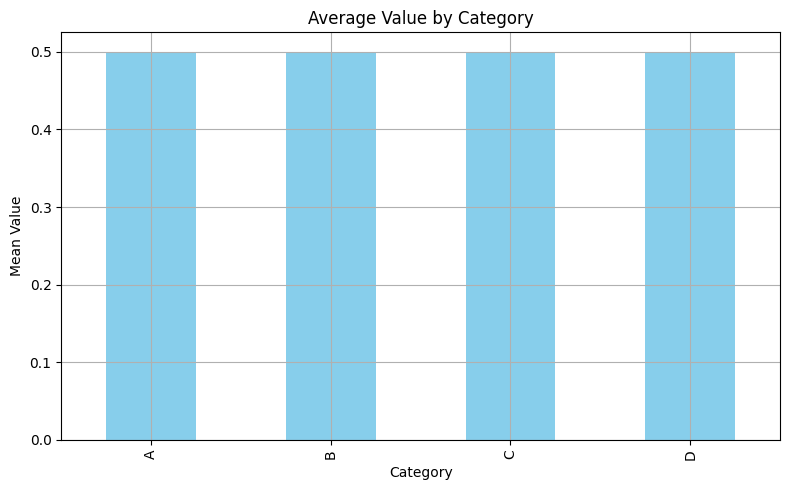

In [25]:
# Step 6: Visualizations
# Bar chart of average value per category
plt.figure(figsize=(8, 5))
grouped.sort_index().plot(kind='bar', color='skyblue')
plt.title('Average Value by Category')
plt.ylabel('Mean Value')
plt.xlabel('Category')
plt.grid(True)
plt.tight_layout()
plt.savefig('mean_value_by_category.png')
plt.show()

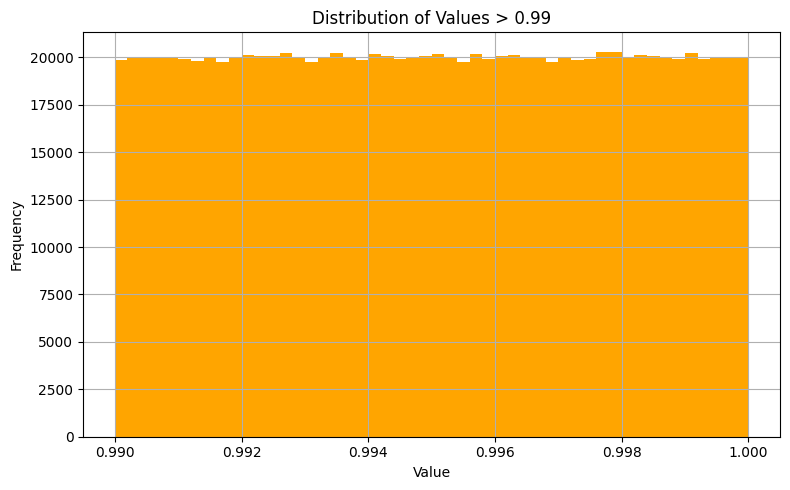

In [26]:
# Histogram of high values
plt.figure(figsize=(8, 5))
high_values['value'].hist(bins=50, color='orange')
plt.title('Distribution of Values > 0.99')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('high_value_distribution.png')
plt.show()

In [27]:
# Final statement
print("\n✅ Analysis complete using Dask without dashboard. Visuals saved as PNG files.")


✅ Analysis complete using Dask without dashboard. Visuals saved as PNG files.


In [28]:
# Dask vs Pandas Scalability Benchmark

import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os


In [29]:
# Step 1: Generate large synthetic dataset

def generate_large_dataset(n_rows, file_name):
    df = pd.DataFrame({
        'id': np.arange(n_rows),
        'value': np.random.rand(n_rows),
        'category': np.random.choice(['A', 'B', 'C', 'D'], size=n_rows)
    })
    df.to_csv(file_name, index=False)

In [30]:
# Create datasets of different sizes
sizes = [1_000_000, 10_000_000, 50_000_000]  # Change or extend as needed
file_names = [f"dataset_{s//1_000_000}M.csv" for s in sizes]

for size, file_name in zip(sizes, file_names):
    if not os.path.exists(file_name):
        print(f"Generating {file_name}...")
        generate_large_dataset(size, file_name)


In [31]:
# Step 2: Benchmarking Pandas vs Dask
pandas_times = []
dask_times = []

for file_name in file_names:
    print(f"\nBenchmarking with {file_name}...")

    # Pandas
    try:
        start = time.time()
        pdf = pd.read_csv(file_name)
        result = pdf.groupby('category')['value'].mean()
        end = time.time()
        pandas_times.append(end - start)
        print(f"Pandas time: {end - start:.2f} sec")
    except Exception as e:
        pandas_times.append(None)
        print(f"Pandas failed: {e}")

    # Dask
    try:
        start = time.time()
        ddf = dd.read_csv(file_name)
        result = ddf.groupby('category')['value'].mean().compute()
        end = time.time()
        dask_times.append(end - start)
        print(f"Dask time: {end - start:.2f} sec")
    except Exception as e:
        dask_times.append(None)
        print(f"Dask failed: {e}")



Benchmarking with dataset_1M.csv...
Pandas time: 0.78 sec
Dask time: 0.92 sec

Benchmarking with dataset_10M.csv...
Pandas time: 7.55 sec
Dask time: 5.76 sec

Benchmarking with dataset_50M.csv...
Pandas time: 32.44 sec


Dask time: 36.88 sec


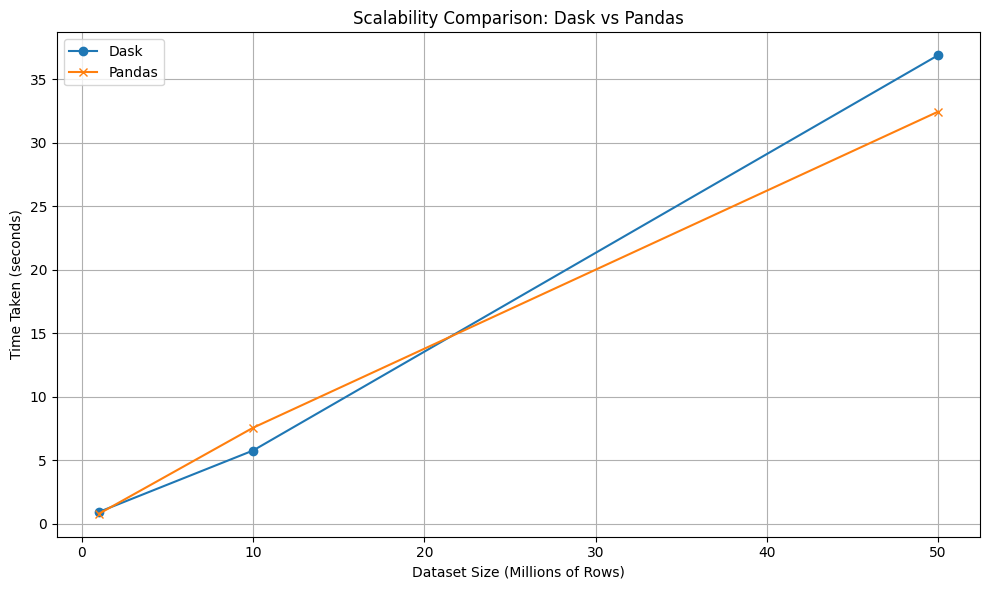


✅ Scalability benchmark complete. Results visualized in 'scalability_comparison.png'.


In [32]:
# Step 3: Visualization of Benchmark Results
plt.figure(figsize=(10, 6))
data_sizes_million = [s // 1_000_000 for s in sizes]

plt.plot(data_sizes_million, dask_times, marker='o', label='Dask')
if any(t is not None for t in pandas_times):
    valid_sizes = [s for s, t in zip(data_sizes_million, pandas_times) if t is not None]
    valid_times = [t for t in pandas_times if t is not None]
    plt.plot(valid_sizes, valid_times, marker='x', label='Pandas')

plt.xlabel('Dataset Size (Millions of Rows)')
plt.ylabel('Time Taken (seconds)')
plt.title('Scalability Comparison: Dask vs Pandas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('scalability_comparison.png')
plt.show()

print("\n✅ Scalability benchmark complete. Results visualized in 'scalability_comparison.png'.")